### Question 1: 2.40

In [1]:
# read csv file 
prices_df <- read.csv('ex02-40Grinnell.csv', header=T)
dim(prices_df)
head(prices_df)

[1] 929  15

,Date,Address,Bedrooms,Baths,SquareFeet,LotSize,YearBuilt,YearSold,MonthSold,DaySold,CostPerSqFt,OrigPrice,ListPrice,SalePrice,SPLPPct
,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,16695,1510 First Ave #112,2,1,1120,NA,1993,2005,9,16,6.25,17000,10500,7000,66.67
2,16880,1020 Center St,3,1,1224,0.1721763,1900,2006,3,20,22.06,35000,35000,27000,77.14
3,16875,918 Chatterton St,4,1,1540,NA,1970,2006,3,15,18.18,54000,47000,28000,59.57
4,16833,1023 & 1025 Spring St.,3,1,1154,NA,1900,2006,2,1,26.00,65000,49000,30000,61.22
5,16667,503 2nd Ave,3,1,1277,0.2066116,1900,2005,8,19,24.08,35000,35000,30750,87.86
6,16583,9090 Clay St,3,1,1079,0.1993572,1900,2005,5,27,38.92,45900,45900,42000,91.50


In [2]:
# fit a simple linear regression model 
s_model <- lm(SalePrice~ListPrice, data=prices_df)
summary(s_model)


Call:
lm(formula = SalePrice ~ ListPrice, data = prices_df)

Residuals:
   Min     1Q Median     3Q    Max 
-55942  -3275    846   4141  44168 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.448e+02  5.236e+02  -0.277    0.782    
ListPrice    9.431e-01  3.201e-03 294.578   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8019 on 927 degrees of freedom
Multiple R-squared:  0.9894,	Adjusted R-squared:  0.9894 
F-statistic: 8.678e+04 on 1 and 927 DF,  p-value: < 2.2e-16


Fitted model: $\hat{SalePrice} = -144.8 + 0.9431 * ListPrice $ <br/>

In [3]:
## a
# calculate 90% confidence interval for mean SalePrice listed at $300,000
data <- data.frame(ListPrice=300000)
predict(s_model, data, level = 0.90, interval="confidence") 

,fit,lwr,upr
1,282774.6,281833,283716.2


In [4]:
## b
# calculate 90% confidence interval for SalePrice listed at $300,000
predict(s_model, data, level = 0.90, interval="predict") 

,fit,lwr,upr
1,282774.6,269537.3,296011.9


c. 

(a) The expected SalePrice of a house with 90% CI that is listed at $300,000 is (281833, 283716.2)

(b) The future SalePrice of a house with 90% CI that is listed at $300,000 is (269537.3, 296011.9)

### Question 2: 3.2

$\hat{Calories} = 109.3 + 1.0*Suger - 3.7*Fiber $<br/>


a. 

1 gram fiber & 11 grams suger: 

Therefore, $\hat{Calories}  = 109.3 + 1.0*11 - 3.7*1 $

             = 116.6 


b.

FF cereal has 110 calories:

Therefore, residual = y - $\hat{y}$

            = 110 - 116.6
            
            = -6.6 
            
Residual is the error value which is the difference between the original value and the estimated/predicted value.

### Question 3: 3.8

a. True. Because if we fit a multiple regression model and then add a new predictor to the model then unadjusted $R^2$ will always increase.

b. False. Because adjusted $R^2$ only increases if the new predictor improves the model more than would be expected by chance. The adjusted $R^2$ decreases when the new predictor improves the model by less than expected by chance. Therefore, adjusted $R^2$ may or may not be greater than $R1^2$ and $R2^2$.

### Question 4: 3.10


a. Year and Mileage are negatively correlated because, generally, newer cars have less mileage as they are driven less and older cars have more mileage as they are driven more. As new cars represent Year that is always greater than that of old cars, and Mileage being smaller with new cars (and larger with old cars), Year and Milage are negatively correlated. 

b. For a fixed manufacture year, Price and Mileage should be negatively correlated because as Mileage increases, Price should decrease.

### Question 5: 3.18

In [5]:
# read csv file 
rails_df <- read.csv('ex03-18Rails.csv', header=T)
dim(rails_df)
head(rails_df)

[1] 104  30

,housenum,acre,acregroup,adj1998,adj2007,adj2011,bedgroup,bedrooms,bikescore,diff2014,⋯,price1998,price2007,price2011,price2014,sfgroup,squarefeet,streetname,streetno,walkscore,zip
,<int>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<int>,<int>,<int>
1,1,0.28,> 1/4 acre,148.3625,233.8418,191.8211,3 beds,3,35,62.36645,⋯,101.5,203.5,181.1,210.729,<= 1500 sf,0.966,Acrebrook Drive,406,9,1062
2,2,0.29,> 1/4 acre,135.2072,261.4203,206.9677,3 beds,3,44,68.96375,⋯,92.5,227.5,195.4,204.171,<= 1500 sf,0.960,Autumn Dr,57,5,1062
3,3,0.36,> 1/4 acre,256.5283,401.0359,347.9472,3 beds,3,66,82.13365,⋯,175.5,349.0,328.5,338.662,> 1500 sf,1.725,Bridge Road,31,46,1062
4,4,0.26,> 1/4 acre,231.6795,305.0861,257.4915,3 beds,3,61,44.57055,⋯,158.5,265.5,243.1,276.250,> 1500 sf,1.727,Bridge Road,200,40,1060
5,5,0.31,> 1/4 acre,271.8762,298.7660,236.6253,4+ beds,4,53,-102.70320,⋯,186.0,260.0,223.4,169.173,> 1500 sf,1.576,Bridge Road,395,32,1062
6,6,0.31,> 1/4 acre,192.9444,275.7840,243.2982,3 beds,3,36,18.54260,⋯,132.0,240.0,229.7,211.487,<= 1500 sf,1.320,Brierwood Drive,23,12,1062


In [6]:
## a
# fit a simple linear regression model using distance
a_model <- lm(adj2007~distance, data=rails_df)
summary(a_model)


Call:
lm(formula = adj2007 ~ distance, data = rails_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-190.55  -58.19  -17.48   25.22  444.41 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  388.204     14.052  27.626  < 2e-16 ***
distance     -54.427      9.659  -5.635 1.56e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 92.13 on 102 degrees of freedom
Multiple R-squared:  0.2374,	Adjusted R-squared:  0.2299 
F-statistic: 31.75 on 1 and 102 DF,  p-value: 1.562e-07


Fitted model: $\hat{adj2007} = 388.204  - 54.427 * distance $ <br/>

In [7]:
## b
# fit a regression model using distance & squarefeet
b_model <- lm(adj2007~distance + squarefeet, data=rails_df)
summary(b_model)


Call:
lm(formula = adj2007 ~ distance + squarefeet, data = rails_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-138.835  -32.621   -1.903   27.369  145.504 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  109.742     20.057   5.472 3.25e-07 ***
distance     -16.486      5.942  -2.775  0.00659 ** 
squarefeet   150.780      9.998  15.080  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.34 on 101 degrees of freedom
Multiple R-squared:  0.7655,	Adjusted R-squared:  0.7608 
F-statistic: 164.8 on 2 and 101 DF,  p-value: < 2.2e-16


Fitted model: $\hat{adj2007} = 109.742  - 16.486 * distance + 150.78 * squarefeet$ <br/>


Both the coefficient of distance and $R^2$ value have changed in model (b). In comparison, model (b)'s $R^2$ value is much larger than model (a) which suggests that model (b) is a much better/significant model. Also, model (b)'s coefficient of 'distance' is much smaller than model (a), and model (b)'s additional covariate- 'squarefeet' makes model (b) realistic.

In [8]:
## c
# calculate 95% confidence interval for distance in (a)
confint(a_model, "distance", level=0.95)
# calculate 95% confidence interval for distance in (b)
confint(b_model, "distance", level=0.95)

,2.5 %,97.5 %
distance,-73.5859,-35.26851


,2.5 %,97.5 %
distance,-28.27307,-4.698861


Model (a): 95% CI: (-73.5859, -35.26851)

Model (b): 95% CI: (-28.27307, -4.698861)

Model (b)'s confidence interval of distance is smaller than model (a) which suggests that adj2007 (price) will decrease within 28.27 and 4.7 if one more mile distance is added to model (b), and 73.5 and 35.2 if one more mile distance is added to model (a).

In [9]:
## d
# predict adj2007 of a particular* house with distance = 0.5 mile & squarefeelt= 1500 square feet usinf two models
data2 <- data.frame(distance=0.5, squarefeet=1500)
predict(a_model, data2, level = 0.95, interval="predict")
predict(b_model, data2, level = 0.95, interval="predict")



,fit,lwr,upr
1,360.9902,177.003,544.9774


,fit,lwr,upr
1,226271.7,196554.5,255988.9


Model (a): Predicted adj2007 (price) using model a is 360.99

Model (b): Predicted adj2007 (price) using model b is 226271.70

### Question 6: 3.22

n = 36

k = 2

SSTotal = SSModel + SSE

17190 = 9350 + 7840

a. 

$R^2$ = 1 - SSE/SSTotal 

    = 1 - (7840/17190)
    
    = 0.5439
    
The regression model explains 29.6% variability in Calories.

b.

$SE = \sqrt{SSE/(n-k)}$

  = $\sqrt{7840/(36-2)}$
  
  = 15.19

c.

 F-ratio = SSModel/SSE
    
        = 9350/7840
        
        = 1.19

d. Since, the p-value is 0.000002 < 0.05, we can conclude that the model is statistically significant for doing statistical analysis.

### Question 7: 3.32

In [10]:
# read csv file 
speed_df <- read.csv('ex03-32Speed.csv', header=T)
dim(speed_df)
head(speed_df)

[1] 21  3

,Year,FatalityRate,StateControl
,<int>,<dbl>,<int>
1,1987,2.41,0
2,1988,2.32,0
3,1989,2.17,0
4,1990,2.08,0
5,1991,1.91,0
6,1992,1.75,0


In [11]:
## a
# fit a simple linear regression model 
model <- lm(FatalityRate~Year, data=speed_df)
summary(model)


Call:
lm(formula = FatalityRate ~ Year, data = speed_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18959 -0.07550 -0.02576  0.09346  0.24606 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 91.320887   8.374227    10.9 1.28e-09 ***
Year        -0.044870   0.004193   -10.7 1.75e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1164 on 19 degrees of freedom
Multiple R-squared:  0.8577,	Adjusted R-squared:  0.8502 
F-statistic: 114.5 on 1 and 19 DF,  p-value: 1.75e-09


Fitted model: $\hat{FatalityRate} = 91.320887  - 0.044870 * Year$<br/>

Therefore, 

$\hat{\beta_1} = - 0.04487$


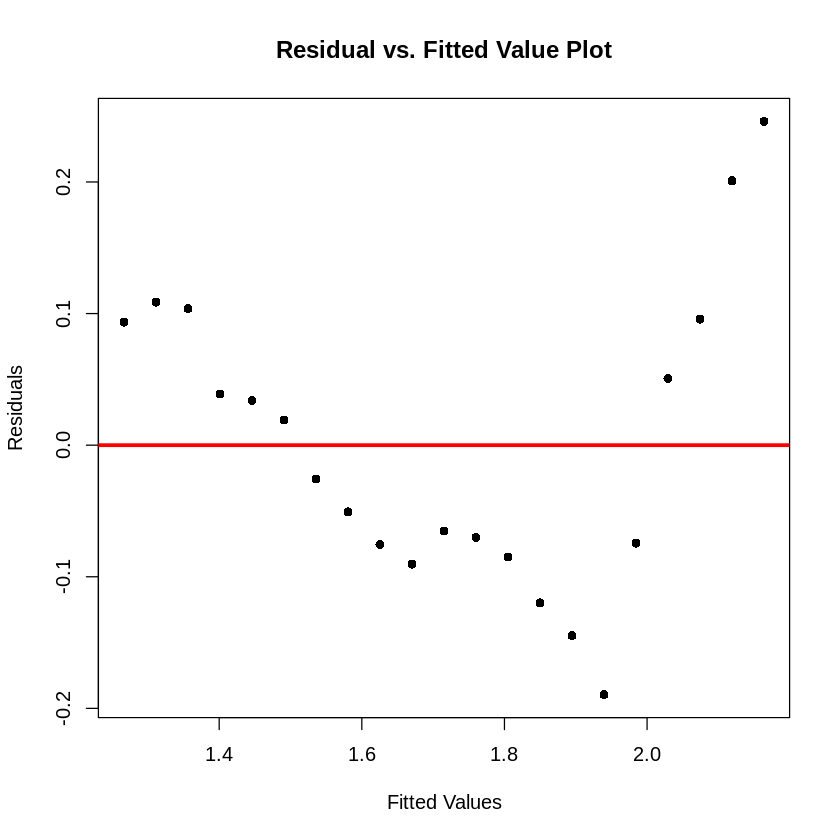

In [12]:
## b 
# plot residual vs fitted value 
plot(model$fitted.values, model$residuals, xlab='Fitted Values', ylab='Residuals', 
     main='Residual vs. Fitted Value Plot', pch=16, cex=1)
abline(h=0, lwd=3, col='red')

The residuals are not noramlly distributed, has skewness.

In [13]:
## c
# fit a simple multiple regression model 
model2 <- lm(FatalityRate~Year+StateControl, data=speed_df)
summary(model2)


Call:
lm(formula = FatalityRate ~ Year + StateControl, data = speed_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.20225 -0.06443 -0.02077  0.08021  0.24859 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  85.278326  15.809290   5.394 3.99e-05 ***
Year         -0.041830   0.007942  -5.267 5.23e-05 ***
StateControl -0.045012   0.099035  -0.455    0.655    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1189 on 18 degrees of freedom
Multiple R-squared:  0.8593,	Adjusted R-squared:  0.8437 
F-statistic: 54.96 on 2 and 18 DF,  p-value: 2.163e-08


Fitted model: $\hat{FatalityRate} = 85.278326  - 0.04183 * Year - 0.045012 * StateControl $<br/>

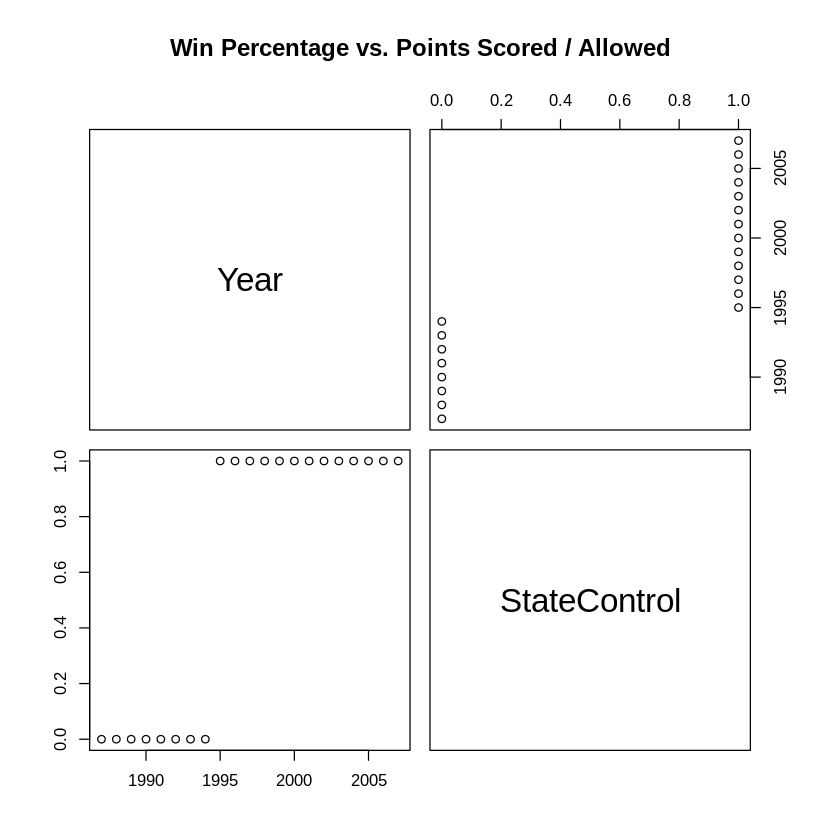

In [14]:
# fit interaction between year and state control
pairs(~Year+StateControl, data=speed_df, main="Win Percentage vs. Points Scored / Allowed")

Yes, there is a significant change in the relationship between Year and StateControl starting in 1995.

d. 

Fitted equation Before 1995: $\hat{FatalityRate} = 85.278326  - 0.04183 * Year$ [StateControl = 0]

Fitted equation After 1995: $\hat{FatalityRate} = 85.233314  - 0.04183 * Year$ [StateControl = 1]